# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lons = np.random.uniform(lon_range[0], lon_range[1], size=1500)
lat_lons = zip(lats, lons)

# Identify nearest city for each lat, lng combination
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
        
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        weather_json = weather_response.json()
       
        # Parse out latitude, longitude, max temp, 
        #humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lon = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind_speed = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                           "Lat": city_lat,
                           "Lon": city_lon,
                           "Max Temp" : city_max_temp,
                           "Humidity": city_humidity,
                           "Cloudiness": city_clouds,
                           "Wind Speed": city_wind_speed,
                           "Country": city_country,
                           "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | itoman
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | pamandzi
Processing Record 4 of Set 1 | utrik
Processing Record 5 of Set 1 | edinburgh of the seven seas
Processing Record 6 of Set 1 | takoradi
Processing Record 7 of Set 1 | alice springs
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | keflavik
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | fale old settlement
Processing Record 15 of Set 1 | tranovaho
City not found. Skipping... 'coord'
Processing Record 16 of Set 1 | kourou
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | algodonales
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | lihue
Process

Processing Record 34 of Set 4 | ashland
Processing Record 35 of Set 4 | touros
Processing Record 36 of Set 4 | alibag
Processing Record 37 of Set 4 | praia da vitoria
Processing Record 38 of Set 4 | dunedin
Processing Record 39 of Set 4 | salinas
Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | charlottetown
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | redlands
Processing Record 44 of Set 4 | mont-dore
Processing Record 45 of Set 4 | fonte boa
Processing Record 46 of Set 4 | el bauga
Processing Record 47 of Set 4 | dalandzadgad
Processing Record 48 of Set 4 | atafu village
Processing Record 49 of Set 4 | sterling
Processing Record 0 of Set 5 | jayapura
Processing Record 1 of Set 5 | tikhvin
Processing Record 2 of Set 5 | antsiranana
Processing Record 3 of Set 5 | mae ramat
Processing Record 4 of Set 5 | birao
Processing Record 5 of Set 5 | weinan
Processing Record 6 of Set 5 | nogliki
Processing Record 7 of Set 5 | hadibu
Processing Rec

Processing Record 27 of Set 8 | mermoz boabab
Processing Record 28 of Set 8 | masterton
Processing Record 29 of Set 8 | belyy yar
Processing Record 30 of Set 8 | mancora
Processing Record 31 of Set 8 | agropoli
Processing Record 32 of Set 8 | birjand
Processing Record 33 of Set 8 | ciudad satelite
Processing Record 34 of Set 8 | lisala
Processing Record 35 of Set 8 | ko pha ngan
Processing Record 36 of Set 8 | strezhevoy
Processing Record 37 of Set 8 | guerrero negro
Processing Record 38 of Set 8 | easton
Processing Record 39 of Set 8 | minas de barroteran
Processing Record 40 of Set 8 | malmberget
Processing Record 41 of Set 8 | banamba
Processing Record 42 of Set 8 | bamboo flat
Processing Record 43 of Set 8 | santa cruz
Processing Record 44 of Set 8 | key west
Processing Record 45 of Set 8 | chui
Processing Record 46 of Set 8 | sao luiz gonzaga
Processing Record 47 of Set 8 | weligama
Processing Record 48 of Set 8 | dhemaji
Processing Record 49 of Set 8 | manzhouli
Processing Record

Processing Record 16 of Set 12 | aubigny-sur-nere
Processing Record 17 of Set 12 | springfield
Processing Record 18 of Set 12 | regina
Processing Record 19 of Set 12 | songkhla
Processing Record 20 of Set 12 | kiunga
Processing Record 21 of Set 12 | nichinan
Processing Record 22 of Set 12 | linxia chengguanzhen
Processing Record 23 of Set 12 | las vegas
Processing Record 24 of Set 12 | yaprakli
Processing Record 25 of Set 12 | kavieng
Processing Record 26 of Set 12 | harstad
Processing Record 27 of Set 12 | karystos
Processing Record 28 of Set 12 | cauquenes
Processing Record 29 of Set 12 | espargos
City not found. Skipping... 'coord'
Processing Record 30 of Set 12 | avellaneda
-----------------------------
Data Retrieval Complete
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lon           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,itoman,26.1247,127.6694,28.43,89,40,2.06,JP,1695068232
1,port-aux-francais,-49.3500,70.2167,4.58,90,97,11.50,TF,1695068233
2,pamandzi,-12.7967,45.2794,24.88,83,0,1.54,YT,1695068233
3,utrik,11.2278,169.8474,27.65,79,99,4.31,MH,1695068234
4,edinburgh of the seven seas,-37.0676,-12.3116,12.67,81,59,9.46,SH,1695068234


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,itoman,26.1247,127.6694,28.43,89,40,2.06,JP,1695068232
1,port-aux-francais,-49.3500,70.2167,4.58,90,97,11.50,TF,1695068233
2,pamandzi,-12.7967,45.2794,24.88,83,0,1.54,YT,1695068233
3,utrik,11.2278,169.8474,27.65,79,99,4.31,MH,1695068234
4,edinburgh of the seven seas,-37.0676,-12.3116,12.67,81,59,9.46,SH,1695068234


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

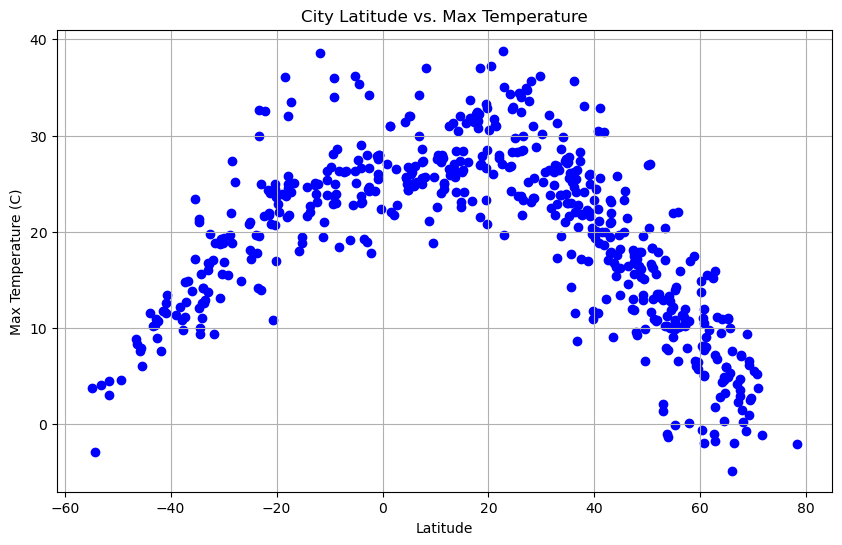

In [28]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', color='b')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

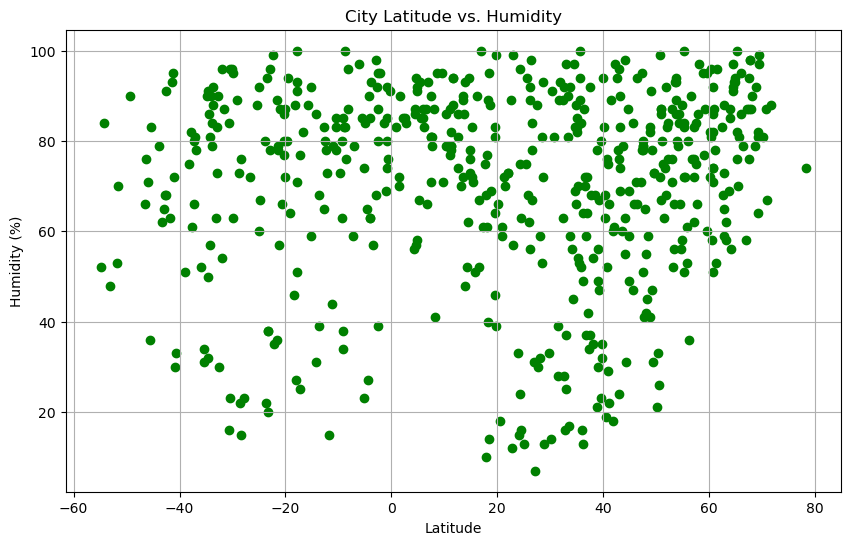

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', color='g')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

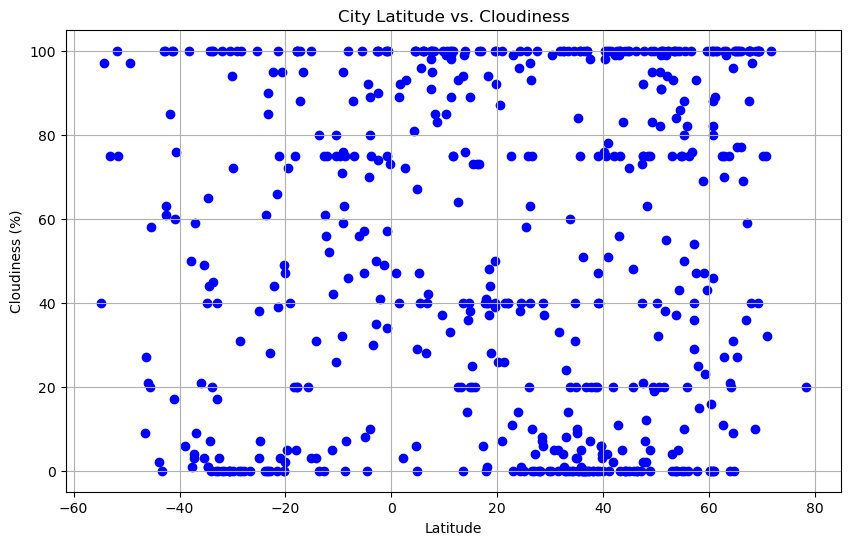

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', color='b')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

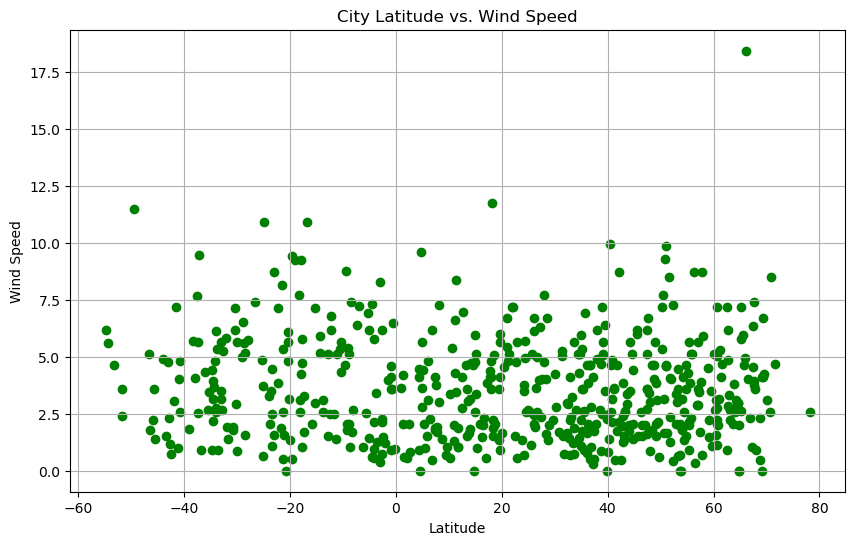

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', color='g')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


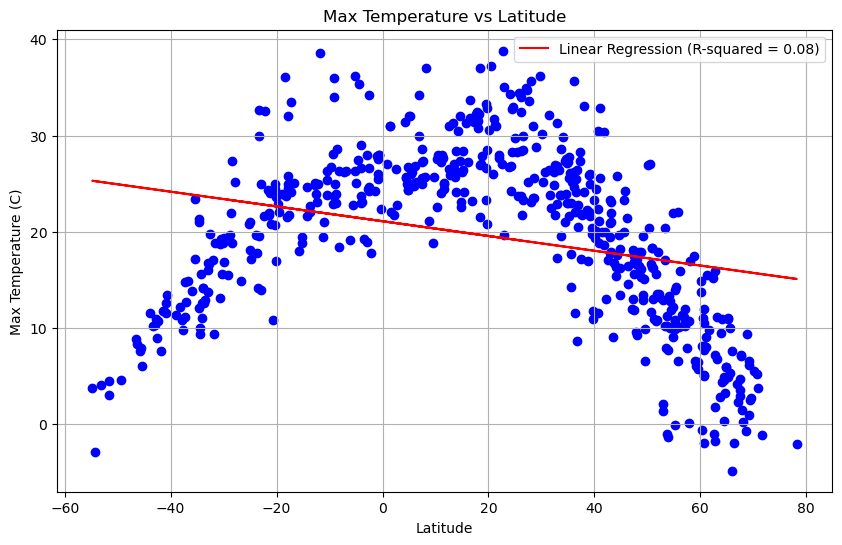

In [32]:
# Define a function to create Linear Regression plots

x = city_data_df["Lat"]
y = city_data_df["Max Temp"]
x_label = "Latitude" 
y_label = "Max Temperature (C)"
title = "Max Temperature vs Latitude"

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o', color='b')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Linear Regression (R-squared = {r_value**2:.2f})')

# Graph properties
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.legend()
plt.show()

In [33]:
city_data_df1 = city_data_df.copy()
city_data_df1.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,itoman,26.1247,127.6694,28.43,89,40,2.06,JP,1695068232
1,port-aux-francais,-49.3500,70.2167,4.58,90,97,11.50,TF,1695068233
2,pamandzi,-12.7967,45.2794,24.88,83,0,1.54,YT,1695068233
3,utrik,11.2278,169.8474,27.65,79,99,4.31,MH,1695068234
4,edinburgh of the seven seas,-37.0676,-12.3116,12.67,81,59,9.46,SH,1695068234


In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,itoman,26.1247,127.6694,28.43,89,40,2.06,JP,1695068232
3,utrik,11.2278,169.8474,27.65,79,99,4.31,MH,1695068234
5,takoradi,4.8845,-1.7554,24.34,91,67,3.62,GH,1695068235
8,keflavik,64.0049,-22.5624,10.95,87,0,2.57,IS,1695068040
11,bilibino,68.0546,166.4372,0.24,90,97,0.93,RU,1695068238


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df1[city_data_df1['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,4.58,90,97,11.50,TF,1695068233
2,pamandzi,-12.7967,45.2794,24.88,83,0,1.54,YT,1695068233
4,edinburgh of the seven seas,-37.0676,-12.3116,12.67,81,59,9.46,SH,1695068234
6,alice springs,-23.7000,133.8833,17.75,22,61,2.06,AU,1695068235
7,waitangi,-43.9535,-176.5597,11.57,79,2,4.92,NZ,1695068236


###  Temperature vs. Latitude Linear Regression Plot

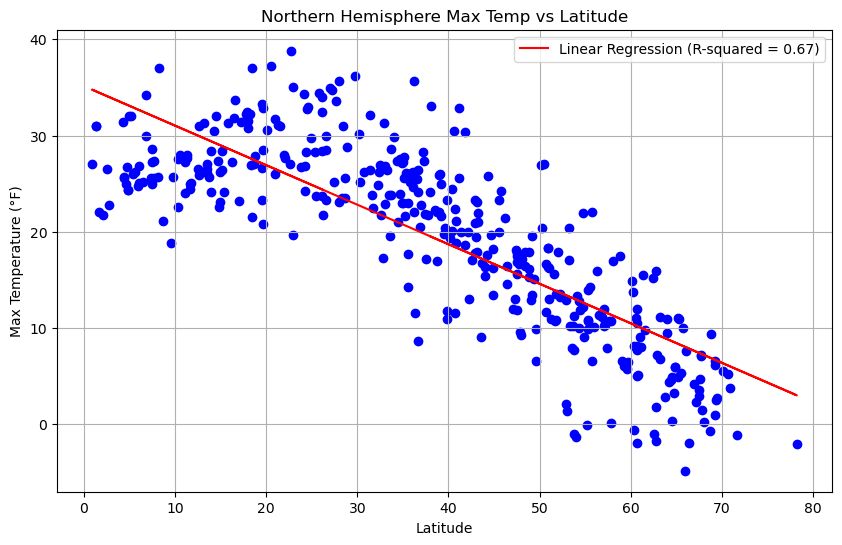

In [36]:
# Linear regression on Northern Hemisphere
#create_linear_regression_plot(city_data_df["Lat"], city_data_df["Max Temp"],
#"Latitude", "Max Temperature (°F)", "Max Temperature vs Latitude")
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
x_label = "Latitude" 
y_label = "Max Temperature (°F)"
title = "Northern Hemisphere Max Temp vs Latitude"

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o', color='b')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Linear Regression (R-squared = {r_value**2:.2f})')

# Graph properties
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.legend()
plt.show()

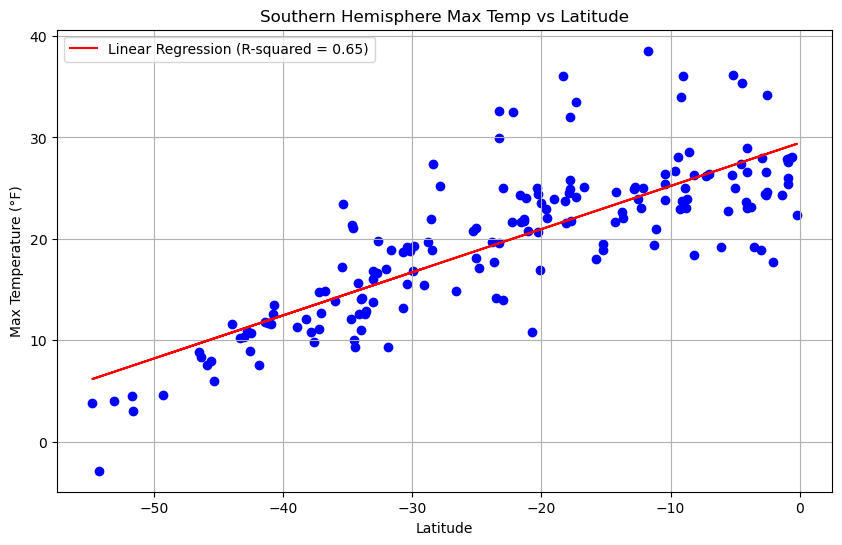

In [37]:
# Linear regression on Southern Hemisphere
#create_linear_regression_plot(city_data_df["Lat"], city_data_df["Max Temp"],
#"Latitude", "Max Temperature (°F)", "Max Temperature vs Latitude")
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
x_label = "Latitude" 
y_label = "Max Temperature (°F)"
title = "Southern Hemisphere Max Temp vs Latitude"

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o', color='b')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Linear Regression (R-squared = {r_value**2:.2f})')

# Graph properties
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.legend()
plt.show()

**Discussion about the linear relationship:** 
The Northern and Southern plots clearly show temperature rises as measurements are collected closer the equator.
Also, the linear regression results for R-squared are closer to 1 for both North and South Hemisphere plots (0.67 and 0.64). This also confirms that, indeed the temperature rised as we approach the equator. 

### Humidity vs. Latitude Linear Regression Plot

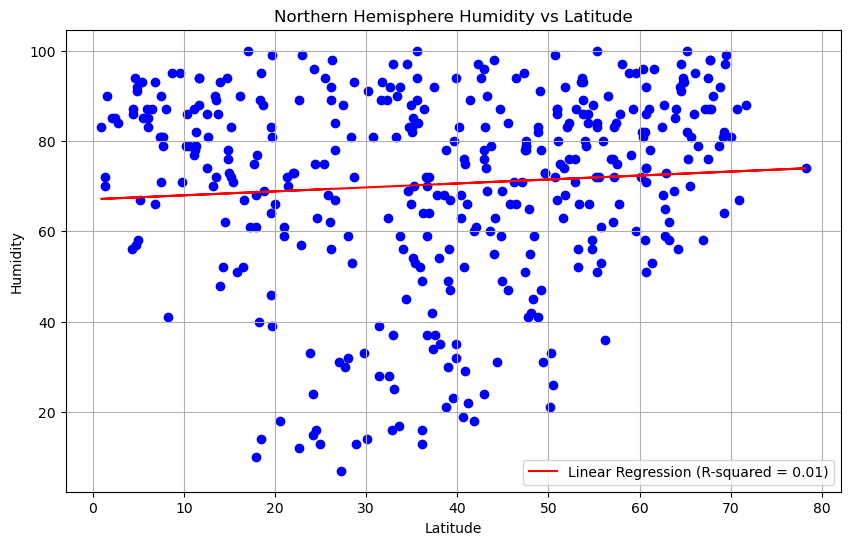

In [38]:
# Northern Hemisphere
#create_linear_regression_plot(city_data_df["Lat"], city_data_df["Max Temp"],
#"Latitude", "Max Temperature (°F)", "Max Temperature vs Latitude")
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
x_label = "Latitude" 
y_label = "Humidity"
title = "Northern Hemisphere Humidity vs Latitude"

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o', color='b')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Linear Regression (R-squared = {r_value**2:.2f})')

# Graph properties
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.legend()
plt.show()

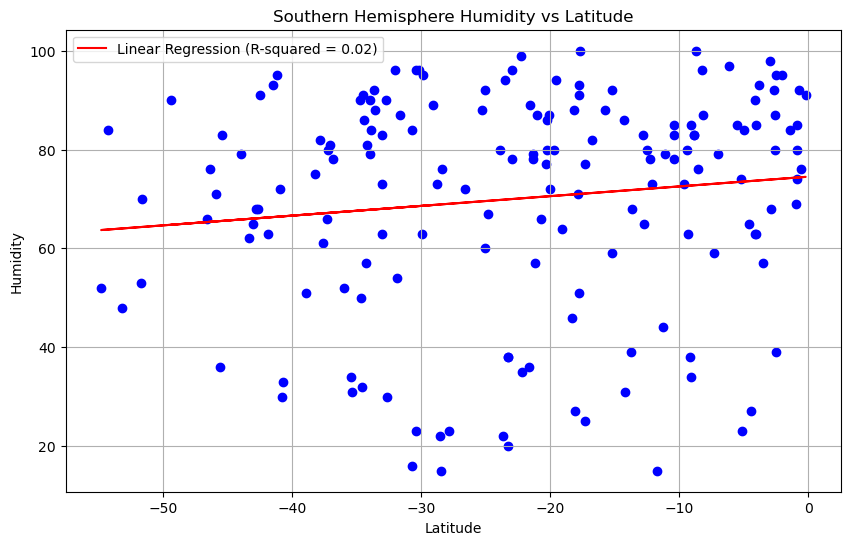

In [39]:
# Southern Hemisphere
#create_linear_regression_plot(city_data_df["Lat"], city_data_df["Max Temp"],
#"Latitude", "Max Temperature (°F)", "Max Temperature vs Latitude")
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
x_label = "Latitude" 
y_label = "Humidity"
title = "Southern Hemisphere Humidity vs Latitude"

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o', color='b')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Linear Regression (R-squared = {r_value**2:.2f})')

# Graph properties
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.legend()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

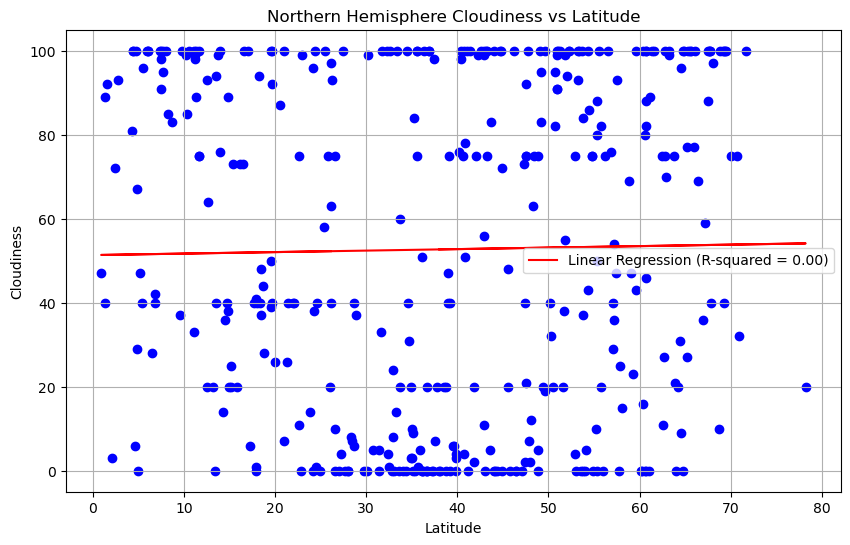

In [40]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
x_label = "Latitude" 
y_label = "Cloudiness"
title = "Northern Hemisphere Cloudiness vs Latitude"

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o', color='b')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Linear Regression (R-squared = {r_value**2:.2f})')

# Graph properties
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.legend()
plt.show()

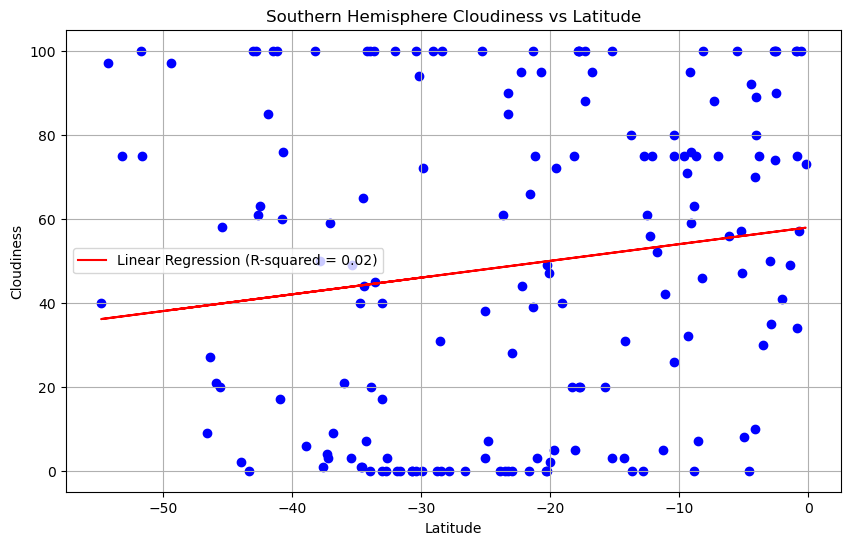

In [41]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
x_label = "Latitude" 
y_label = "Cloudiness"
title = "Southern Hemisphere Cloudiness vs Latitude"

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o', color='b')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Linear Regression (R-squared = {r_value**2:.2f})')

# Graph properties
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.legend()
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

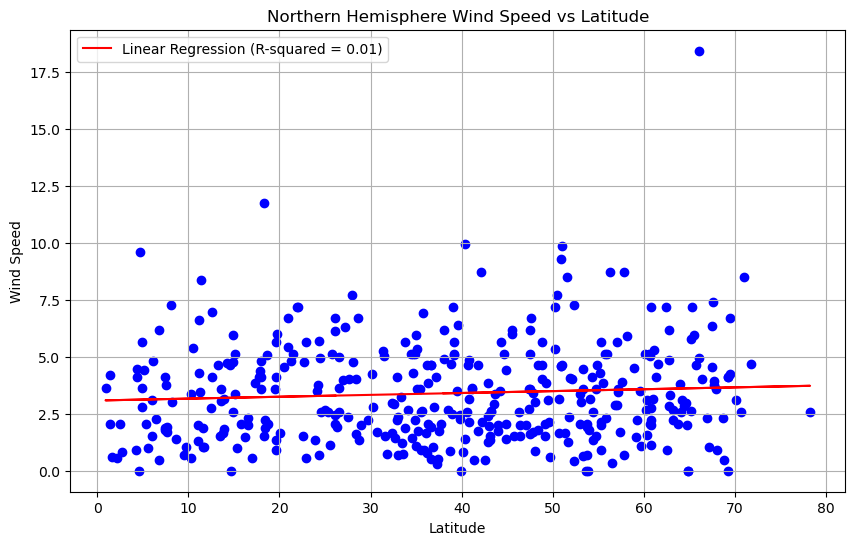

In [42]:
# Northern Hemisphere   Wind Speed
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
x_label = "Latitude" 
y_label = "Wind Speed"
title = "Northern Hemisphere Wind Speed vs Latitude"

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o', color='b')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Linear Regression (R-squared = {r_value**2:.2f})')

# Graph properties
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.legend()
plt.show()

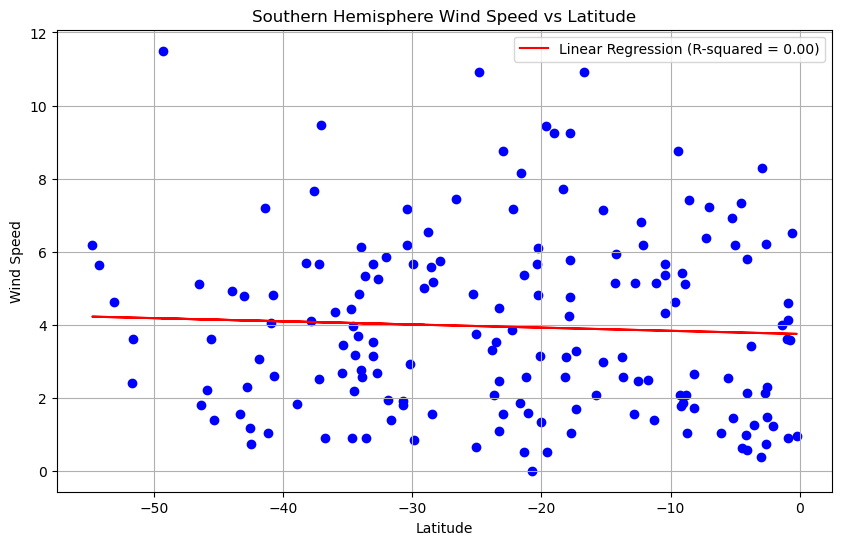

In [43]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
x_label = "Latitude" 
y_label = "Wind Speed"
title = "Southern Hemisphere Wind Speed vs Latitude"

plt.figure(figsize=(10, 6))
plt.scatter(x, y, marker='o', color='b')

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)
regression_line = slope * x + intercept
plt.plot(x, regression_line, color='red', label=f'Linear Regression (R-squared = {r_value**2:.2f})')

# Graph properties
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig13.png")

# Show plot
plt.legend()
plt.show()

**Discussion about the linear relationship:** All results other than temperature, clearly do not show a correllation between increase as we approach the equator. The plots are similar across latitude. Also, the R-squared values are nearly zero. 